# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [161]:
from gensim import corpora, models, matutils
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [6]:
dictionary.token2id

{'black olives': 0,
 'feta cheese crumbles': 1,
 'garbanzo beans': 2,
 'garlic': 3,
 'grape tomatoes': 4,
 'pepper': 5,
 'purple onion': 6,
 'romaine lettuce': 7,
 'seasoning': 8,
 'eggs': 9,
 'green tomatoes': 10,
 'ground black pepper': 11,
 'ground pepper': 12,
 'milk': 13,
 'plain flour': 14,
 'salt': 15,
 'thyme': 16,
 'tomatoes': 17,
 'vegetable oil': 18,
 'yellow corn meal': 19,
 'butter': 20,
 'chicken livers': 21,
 'cooking oil': 22,
 'garlic powder': 23,
 'green chilies': 24,
 'grilled chicken breasts': 25,
 'mayonaise': 26,
 'soy sauce': 27,
 'yellow onion': 28,
 'water': 29,
 'wheat': 30,
 'bay leaf': 31,
 'black pepper': 32,
 'boneless chicken skinless thigh': 33,
 'cayenne pepper': 34,
 'chili powder': 35,
 'cornflour': 36,
 'double cream': 37,
 'garam masala': 38,
 'garlic paste': 39,
 'ground cumin': 40,
 'lemon juice': 41,
 'natural yogurt': 42,
 'oil': 43,
 'onions': 44,
 'passata': 45,
 'shallots': 46,
 'baking powder': 47,
 'fresh ginger root': 48,
 'ground cinnamon

In [7]:
print(texts[0])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [8]:
models.ldamodel.LdaModel?

Init signature:
models.ldamodel.LdaModel(
    corpus=None,
    num_topics=100,
    id2word=None,
    distributed=False,
    chunksize=2000,
    passes=1,
    update_every=1,
    alpha='symmetric',
    eta=None,
    decay=0.5,
    offset=1.0,
    eval_every=10,
    iterations=50,
    gamma_threshold=0.001,
    minimum_probability=0.01,
    random_state=None,
    ns_conf=None,
    minimum_phi_value=0.01,
    per_word_topics=False,
    callbacks=None,
    dtype=<class 'numpy.float32'>,
)
Docstring:     
Train and use Online Latent Dirichlet Allocation model as presented in `'Online Learning for LDA' by Hoffman et al.`_

Examples
-------
Initialize a model using a Gensim corpus

.. sourcecode:: pycon

    >>> from gensim.test.utils import common_corpus
    >>>
    >>> lda = LdaModel(common_corpus, num_topics=10)

You can then infer topic distributions on new, unseen documents.

.. sourcecode:: pycon

    >>> doc_bow = [(1, 0.3), (2, 0.1), (0, 0.09)]
    >>> doc_lda = lda[doc_bow]

The mode

In [9]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel = models.ldamodel.LdaModel(corpus=corpus, num_topics=40, id2word=dictionary, passes=5)

In [10]:
topics = ldamodel.show_topics(num_topics=40, num_words=10, formatted=False)

In [14]:
save_answers1(*count_array)

In [12]:
count_words = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
count_array = []
for word in count_words:
    count_i = 0
    for topic in topics:
        topic = [x[0] for x in topic[1]]
        count_i += topic.count(word)
    count_array.append(count_i)

In [13]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [37]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [27]:
dictionary2.dfs

{7: 270,
 0: 229,
 4: 228,
 3: 7380,
 5: 4438,
 6: 1896,
 8: 137,
 2: 148,
 1: 358,
 14: 154,
 12: 385,
 15: 18048,
 17: 3058,
 11: 4784,
 16: 361,
 9: 3388,
 10: 108,
 19: 341,
 13: 2263,
 18: 4385,
 26: 781,
 22: 483,
 24: 768,
 25: 5,
 23: 1442,
 28: 1184,
 27: 3296,
 20: 4847,
 21: 65,
 29: 7457,
 30: 26,
 32: 2627,
 46: 1477,
 36: 103,
 34: 1523,
 44: 7972,
 39: 282,
 41: 1394,
 35: 2036,
 45: 24,
 43: 1970,
 40: 2747,
 33: 343,
 38: 925,
 37: 40,
 42: 18,
 31: 839,
 52: 6434,
 48: 338,
 49: 1231,
 53: 1298,
 50: 678,
 51: 501,
 47: 1738,
 59: 7971,
 58: 461,
 54: 796,
 57: 1730,
 56: 1094,
 61: 73,
 62: 554,
 60: 940,
 55: 103,
 66: 22,
 67: 1,
 65: 1348,
 63: 173,
 64: 51,
 71: 56,
 75: 300,
 74: 119,
 70: 965,
 68: 424,
 72: 164,
 73: 1439,
 69: 1698,
 76: 298,
 78: 1137,
 77: 2747,
 79: 3113,
 83: 134,
 87: 62,
 81: 1706,
 86: 154,
 88: 55,
 84: 164,
 80: 1223,
 82: 578,
 85: 185,
 96: 425,
 93: 1503,
 92: 152,
 94: 341,
 99: 439,
 98: 1773,
 97: 1891,
 89: 264,
 95: 168,
 91:

In [39]:
count_4000

[3, 5, 15, 11, 18, 20, 29, 44, 52, 59, 104, 114]

In [38]:
count_4000 = [x for x in dictionary2.dfs if dictionary2.dfs[x] > 4000]

In [29]:
dict_size_before = len(dictionary2.dfs)
corpus_size_before = len(corpus)
dict_size_before, corpus_size_before

(6714, 39774)

In [42]:
dictionary2.filter_tokens(count_4000)

In [46]:
corpus_2

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(7, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(23, 1)],
 [(10, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(7, 1),
  (10, 1),
  (11, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(24, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(7, 1), (39, 1), (44, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(4, 1),
  (48, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(47, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(0, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(70, 1),
  (79, 1),
  (80, 1),
  (81, 

In [61]:
dict_size_after = len(dictionary2.dfs)
corpus_2 = [dictionary2.doc2bow(text) for text in texts]

In [32]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [60]:
save_answers2(dict_size_before, dict_size_after, sum(dictionary.dfs.values()), sum(dictionary2.dfs.values()))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [64]:
ldamodel_2.top_topics?

Signature:
ldamodel_2.top_topics(
    corpus=None,
    texts=None,
    dictionary=None,
    window_size=None,
    coherence='u_mass',
    topn=20,
    processes=-1,
)
Docstring:
Get the topics with the highest coherence score the coherence for each topic.

Parameters
----------
corpus : iterable of list of (int, float), optional
    Corpus in BoW format.
texts : list of list of str, optional
    Tokenized texts, needed for coherence models that use sliding window based (i.e. coherence=`c_something`)
    probability estimator .
dictionary : :class:`~gensim.corpora.dictionary.Dictionary`, optional
    Gensim dictionary mapping of id word to create corpus.
    If `model.id2word` is present, this is not needed. If both are provided, passed `dictionary` will be used.
window_size : int, optional
    Is the size of the window to be used for coherence measures using boolean sliding window as their
    probability estimator. For 'u_mass' this doesn't matter.
    If None - the default window siz

In [62]:
np.random.seed(76543)
ldamodel_2 = models.ldamodel.LdaModel(corpus=corpus_2, num_topics=40, id2word=dictionary2, passes=5)

In [67]:
coh_2 = np.mean([x[1] for x in ldamodel_2.top_topics(corpus_2)])

In [69]:
coh_1 = np.mean([x[1] for x in ldamodel.top_topics(corpus)])

In [70]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [71]:
save_answers3(coh_1, coh_2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [85]:
ldamodel_2.get_document_topics(corpus[0])

[(4, 0.20249842), (25, 0.102497034), (31, 0.49411222), (33, 0.11088891)]

Также выведите содержимое переменной *.alpha* второй модели:

In [90]:
ldamodel_2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [120]:
np.random.seed(76543)
ldamodel_3 = models.ldamodel.LdaModel(corpus=corpus_2, num_topics=40, id2word=dictionary2, passes=5, alpha=1)

In [127]:
ldamodel_2.get_document_topics(corpus_2, minimum_probability=0.01)[0]

[(25, 0.12812185), (31, 0.61757886), (33, 0.13867103)]

In [128]:
dt1 = np.sum([1 for x in ldamodel_2.get_document_topics(corpus_2, minimum_probability=0.01) for x_i in x])
dt2 = np.sum([1 for x in ldamodel_3.get_document_topics(corpus_2, minimum_probability=0.01) for x_i in x])

In [129]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [130]:
save_answers4(dt1, dt2)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

In [151]:
tetta_t = ldamodel_2.get_document_topics(corpus_2)

In [152]:
y = np.array([x["cuisine"] for x in recipes])

In [162]:
tetta_t_csr = matutils.corpus2csc(tetta_t)

In [179]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=100)
acc_mean = cross_val_score(model, tetta_t_csr.T, y, cv=3)

In [178]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [181]:
np.mean(acc_mean)

0.5528485945592598

In [180]:
save_answers5(np.mean(acc_mean))

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

In [188]:
np.unique(y)

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype='<U12')

In [183]:
X = matutils.corpus2csc(corpus)

In [186]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=100)
acc_mean = cross_val_score(model, X.T, y, cv=3)

In [187]:
np.mean(acc_mean)

0.7080756272942123

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [207]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr / sum(topic_distr))
        print(w)

In [208]:
generate_recipe(ldamodel_2, 3)

ground white pepper
fresh ginger
chicken broth


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [209]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [219]:
ldamodel_2.get_document_topics(corpus_2)[0]

[(25, 0.12812187), (31, 0.61759645), (33, 0.13865347)]

In [226]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [211]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [227]:
# Визуализируйте матрицу
cuisine_matrix = compute_topic_cuisine_matrix(ldamodel_2, corpus_2, recipes)

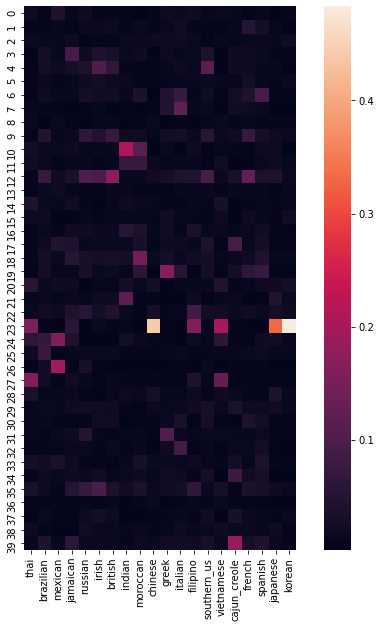

In [215]:
plot_matrix(cuisine_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 